In [1]:
# Import needed libraries and classes

import os
import matplotlib.pyplot as plt

from Code.utils.dataset import Dataset
import Code.utils.store_model as store_model

from tensorflow.keras import models
import tensorflow.keras.preprocessing as preprocessing
from tensorflow.keras.layers import LSTM, Dense, Embedding, GRU
from tensorflow.keras.initializers import GlorotUniform
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.text import Tokenizer

import random
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras import initializers

[nltk_data] Downloading package punkt to C:\Users\Guilherme
[nltk_data]     Barbosa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
os.environ['TF_DETERMINISTIC_OPS'] = '1'
tf.random.set_seed(42)
random.seed(42)
np.random.seed(42)

In [3]:
# Load datasets

dataset = Dataset('../../Dataset/DatasetsGerados/dataset_training_input.csv',
                  '../../Dataset/DatasetsGerados/dataset_training_output.csv',
                  '../../Dataset/DatasetsGerados/dataset_validation_input.csv',
                  '../../Dataset/DatasetsGerados/dataset_validation_output.csv',
                  '../../Dataset/dataset1_inputs.csv',
                  '../../Dataset/dataset1_outputs.csv')

X_train, y_train, X_validation, y_validation, X_test, y_test, ids = dataset.get_datasets_unprocessed('Text', 'Label', sep='\t', rem_punctuation=True)

max_words = 10000
max_len = 500

tokenizer = Tokenizer(num_words=max_words)  # limit to top max_words words
tokenizer.fit_on_texts(X_train.iloc[:, 0])

X_train = tokenizer.texts_to_sequences(X_train.iloc[:, 0])
X_validation = tokenizer.texts_to_sequences(X_validation.iloc[:, 0])
X_test = tokenizer.texts_to_sequences(X_test.iloc[:, 0])

X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)
X_validation = preprocessing.sequence.pad_sequences(X_validation, maxlen=max_len)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

In [4]:
# max_words = 2000, max_len = 500, dim_embed = 4, Embedding(max_words, dim_embed), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=47)), Dropout(0.6, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 70% no dataset do stor
# max_words = 2000, max_len = 500, dim_embed = 4, Embedding(max_words, dim_embed), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.6, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 73.8% no dataset do stor
# max_words = 2000, max_len = 500, dim_embed = 4, Embedding(max_words, dim_embed), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.3, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 68.75% no dataset do stor
# max_words = 2000, max_len = 500, dim_embed = 4, Embedding(max_words, dim_embed), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48), return_sequences=True), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.6, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 65% no dataset do stor
# max_words = 2000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.6, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 70% no dataset do stor
# max_words = 2000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.5, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 75% no dataset do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.5, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 67.5% no dataset do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.4, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.5, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 66.3% no dataset do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.3, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.3, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 71.25% no dataset do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.2, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 72.5% no dataset do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 78.75% no dataset do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.1, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 66.25% no dataset do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.2, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.1, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 65% no dataset do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=Adam(learning_rate=0.0001), 66.25% no dataset do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=Adam(learning_rate=0.001), 66.25% no dataset do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=Adam(learning_rate=0.01), 75% no dataset do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=Adam(learning_rate=0.1), 67.5% no dataset do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=Adam(learning_rate=0.05), 70% no dataset do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=Adam(learning_rate=0.02), 68.75% no dataset do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=Adagrad(learning_rate=0.0001), 55% no dataset do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=Adagrad(learning_rate=0.001), 56.25% no dataset do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=Adagrad(learning_rate=0.01), 68.75% no dataset do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=Adagrad(learning_rate=0.1), 63.75% no dataset do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=Adagrad(learning_rate=0.05), 67.5% no dataset do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=Adamax(learning_rate=0.0001), 66.25% no dataset do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 79.23% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=Adamax(learning_rate=0.001), 66.15% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=Adamax(learning_rate=0.01), 78.46% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=Adamax(learning_rate=0.1), 78.46% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=Adamax(learning_rate=1.0), 57.69% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=Adamax(learning_rate=0.5), 63.08% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=Adamax(learning_rate=0.05), 70% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=Adamax(learning_rate=0.005), 65.38% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=RMSprop(learning_rate=0.0001), 69.23% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=RMSprop(learning_rate=0.001), 79.23% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=RMSprop(learning_rate=0.01), 77.69% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=RMSprop(learning_rate=0.1), 64.62% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer=RMSprop(learning_rate=0.005), 73.08% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(16, activation='sigmoid'), Dense(1, activation='sigmoid'), optimizer='rmsprop', 71.54% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(8, activation='sigmoid'), Dense(1, activation='sigmoid'), optimizer='rmsprop', 66.92% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(32, activation='sigmoid'), Dense(1, activation='sigmoid'), optimizer='rmsprop', 70% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(24, activation='sigmoid'), Dense(1, activation='sigmoid'), optimizer='rmsprop', 67.69% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(32, activation='sigmoid'), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 69.23% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(16, activation='sigmoid'), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 73.08% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(10, activation='sigmoid'), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 70% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(12, activation='sigmoid'), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 70.77% no dataset_novo do stor
# max_words = 10000, max_len 2= 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(32, activation='sigmoid'), Dropout(0.5, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 70.77% no dataset_novo do stor
# max_words = 10000, max_len 2= 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(16, activation='sigmoid'), Dropout(0.5, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 75.38% no dataset_novo do stor
# max_words = 10000, max_len 2= 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(16, activation='sigmoid'), Dropout(0.8, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 70% no dataset_novo do stor
# max_words = 10000, max_len 2= 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(16, activation='sigmoid'), Dropout(0.6, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 70.38% no dataset_novo do stor
# max_words = 10000, max_len 2= 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(16, activation='sigmoid'), Dropout(0.4, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 78.46% no dataset_novo do stor
# max_words = 10000, max_len 2= 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(16, activation='sigmoid'), Dropout(0.35, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 77.69% no dataset_novo do stor
# max_words = 10000, max_len 2= 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(16, activation='sigmoid'), Dropout(0.4, seed=666), Dense(8, activation='sigmoid'), Dense(1, activation='sigmoid'), optimizer='rmsprop', 70% no dataset_novo do stor
# max_words = 10000, max_len 2= 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(16, activation='sigmoid'), Dropout(0.4, seed=666), Dense(8, activation='sigmoid'), Dropout(0.4, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 70% no dataset_novo do stor
# max_words = 10000, max_len 2= 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(16, activation='sigmoid'), Dropout(0.2, seed=666), Dense(8, activation='sigmoid'), Dropout(0.4, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 74.62% no dataset_novo do stor
# max_words = 10000, max_len 2= 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(16, activation='sigmoid'), Dropout(0.2, seed=666), Dense(8, activation='sigmoid'), Dropout(0.3, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 69.23% no dataset_novo do stor
# max_words = 10000, max_len 2= 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(16, activation='sigmoid'), Dropout(0.3, seed=666), Dense(8, activation='sigmoid'), Dropout(0.4, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 65.38% no dataset_novo do stor
# max_words = 10000, max_len 2= 500, dim_embed = 20, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(16, activation='sigmoid'), Dropout(0.3, seed=666), Dense(8, activation='sigmoid'), Dropout(0.3, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 72.31% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 40, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 76.15% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 60, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 76.92% no dataset_novo do stor
# max_words = 10000, max_len = 500, dim_embed = 100, Embedding(max_words, dim_embed), Dropout(0.1, seed=666), GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)), Dropout(0.2, seed=666), Dense(1, activation='sigmoid'), optimizer='rmsprop', 76.15% no dataset_novo do stor

In [5]:
embeddings_initializer=initializers.GlorotUniform(seed=666)

dim_embed = 100

model = models.Sequential()
model.add(Embedding(max_words, dim_embed))
model.add(Dropout(0.1, seed=666))
model.add(GRU(dim_embed, activation='tanh', kernel_initializer=GlorotUniform(seed=48)))
model.add(Dropout(0.2, seed=666))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.3, seed=666))
model.add(Dense(8, activation='sigmoid'))
model.add(Dropout(0.3, seed=666))
model.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.RMSprop(learning_rate=0.005)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# model.summary()

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_validation,y_validation))

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 139ms/step - acc: 0.5100 - loss: 0.7401 - val_acc: 0.6640 - val_loss: 0.6896
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - acc: 0.5252 - loss: 0.6971 - val_acc: 0.6980 - val_loss: 0.6067
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - acc: 0.7934 - loss: 0.5472 - val_acc: 0.9570 - val_loss: 0.3700
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - acc: 0.9595 - loss: 0.3486 - val_acc: 0.9960 - val_loss: 0.2280
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 138ms/step - acc: 0.9880 - loss: 0.2448 - val_acc: 0.9990 - val_loss: 0.1443
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - acc: 0.9928 - loss: 0.1707 - val_acc: 0.9990 - val_loss: 0.0945
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 137ms/step - acc: 0.9870 - loss: 0.1363 - val_acc: 1.0000 - val_loss: 0.0632
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/step - acc: 0.9955 - loss: 0.0969 - val_acc: 0.9980 - val_loss: 0.0447
Epoch 9/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 136ms/

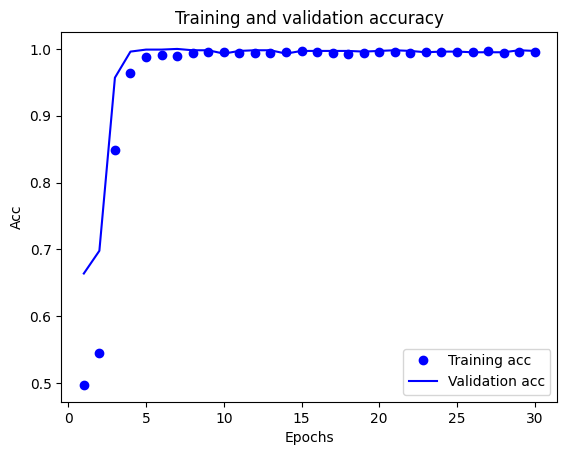

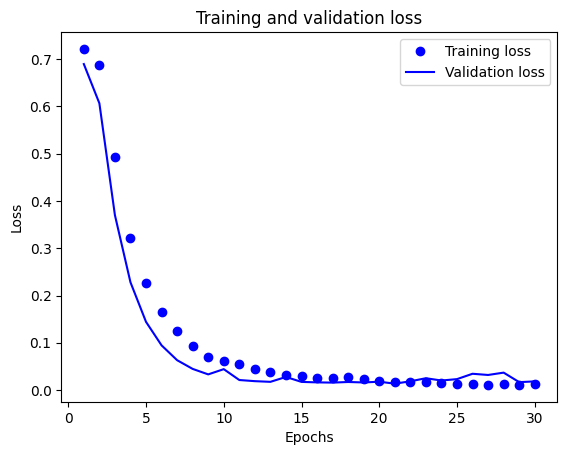

In [6]:
# Plot curves

history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

# Plot loss curves

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
# Predict output

output = model.predict(X_test)

if y_test is not None:
    # Evaluate Model

    print(model.evaluate(X_test, y_test))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - acc: 0.7447 - loss: 2.0940
[1.9754899740219116, 0.7615384459495544]


In [8]:
# Store output

results_filepath = './Results/embedding_gru_results.csv'

# Ensure the directory exists
os.makedirs(os.path.dirname(results_filepath), exist_ok=True)

results = dataset.merge_results(ids, output)
results.to_csv(results_filepath, sep='\t', index=False)

In [9]:
# Store network model

model_filepath = './Model/embedding_gru'
model_key = 'embedding_gru'

store_model.store_model(model_filepath, model_key, model)

In [10]:
# Retrieve network model

model_filepath = './Model/embedding_gru'
model_key = 'embedding_gru'

model = store_model.retrieve_model(model_filepath, model_key)

In [11]:
dataset.set_dataset_test('../../Dataset/dataset1_inputs.csv', '../../Dataset/dataset1_outputs.csv')

X_test, y_test, ids = dataset.get_test_dataset_unprocessed('Text', 'Label', sep='\t', rem_punctuation=False)

X_test = tokenizer.texts_to_sequences(X_test.iloc[:, 0])
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)